In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
address = "https://raw.githubusercontent.com/Jaeik-Jeong/STCNN/main/results/"
data_csv = pd.read_csv(address+'ca_data.csv', index_col=0)

test_predict_AR    = pd.read_csv(address+'ca_predict_AR.csv', index_col=0)
test_predict_FNN   = pd.read_csv(address+'ca_predict_FNN.csv', index_col=0)
test_predict_LSTM  = pd.read_csv(address+'ca_predict_LSTM.csv', index_col=0)
test_predict_STCNN = pd.read_csv(address+'ca_predict_STCNN.csv', index_col=0)

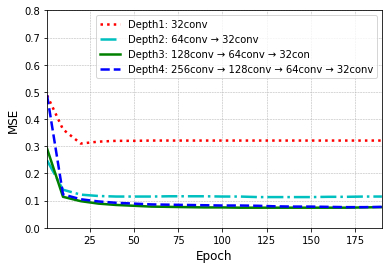

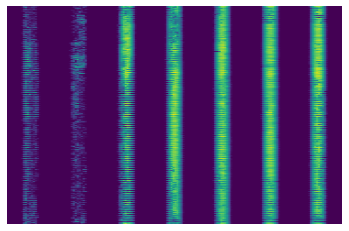

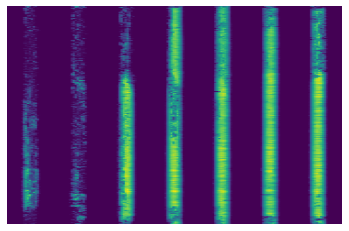

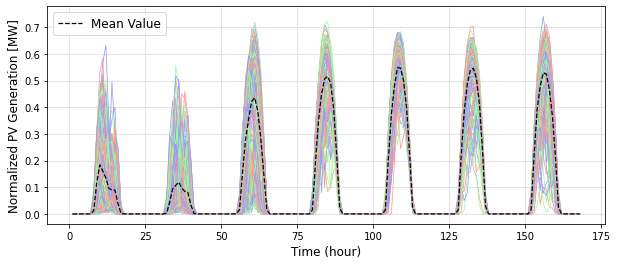

AR NRMSE : 10.59 %
FNN NRMSE : 9.8 %
LSTM NRMSE : 8.74 %
STCNN NRMSE : 7.9799999999999995 %
AR MAPE : 5.53 %
FNN MAPE : 5.1499999999999995 %
LSTM MAPE : 4.25 %
STCNN MAPE : 3.9800000000000004 %
AR MASE : 1.16
FNN MASE : 1.08
LSTM MASE : 0.89
STCNN MASE : 0.84


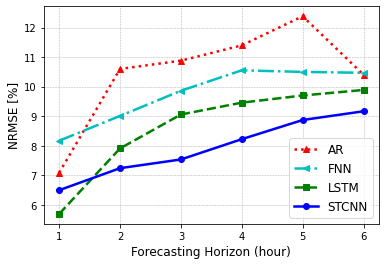

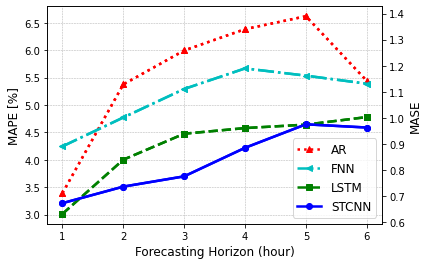

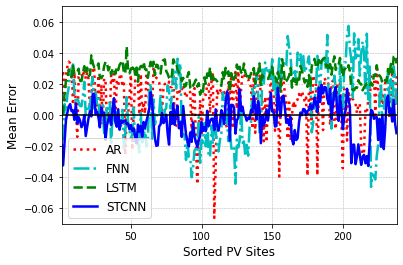

AR MAPE : 5.53 %
FNN MAPE : 5.1499999999999995 %
LSTM MAPE : 4.25 %
STCNN MAPE : 3.9800000000000004 %
AR MAPEa : 4.0 %
FNN MAPEa : 3.15 %
LSTM MAPEa : 3.37 %
STCNN MAPEa : 2.4 %
AR MAPE Improvement : 27.67 %
FNN MAPE Improvement : 38.83 %
LSTM MAPE Improvement : 20.71 %
STCNN MAPE Improvement : 39.7 %


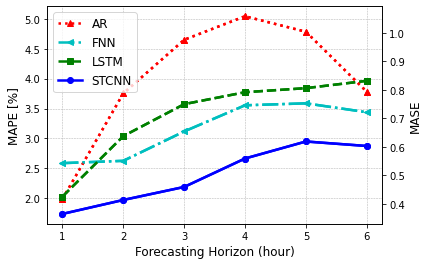

In [3]:
site_no = data_csv.shape[1]
data = np.transpose(np.array(data_csv))

Gpast = 18 # The number of past data for input
Gpost = 6 # The number of post data for output
Gsize = len(data_csv)
GsizeT = int(Gsize*0.6)
GsizeV = int(Gsize*0.8)
Gbatch_size = 128
fontsize1 = 12
fontsize2 = 10

depthx = [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190]
depth1 = [0.487,0.362,0.310,0.317,0.320,0.320,0.321,0.321,0.321,0.321,\
          0.321,0.321,0.321,0.321,0.321,0.321,0.321,0.321,0.321,0.321]
depth2 = [0.248,0.140,0.122,0.117,0.115,0.115,0.115,0.116,0.116,0.116,\
          0.115,0.115,0.113,0.113,0.113,0.113,0.114,0.114,0.115,0.115]
depth3 = [0.291,0.114,0.098,0.089,0.084,0.081,0.078,0.077,0.076,0.075,\
          0.075,0.074,0.074,0.074,0.074,0.074,0.074,0.074,0.075,0.076]
depth4 = [0.488,0.123,0.105,0.097,0.092,0.089,0.086,0.085,0.084,0.083,\
          0.082,0.082,0.081,0.079,0.078,0.078,0.077,0.076,0.076,0.077]

fig_selection = plt.figure()
plt.plot(depthx, depth1, "r:", linewidth=2.5, label="Depth1: 32conv")
plt.plot(depthx, depth2, "c-.", linewidth=2.5, label="Depth2: 64conv → 32conv")
plt.plot(depthx, depth3, "g-", linewidth=2.5, label="Depth3: 128conv → 64conv → 32con")
plt.plot(depthx, depth4, "b--", linewidth=2.5, label="Depth4: 256conv → 128conv → 64conv → 32conv")
plt.xlabel("Epoch", fontsize=fontsize1)
plt.ylabel("MSE", fontsize=fontsize1)
plt.xlim([1,190])
plt.ylim([0,0.8])
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=fontsize2, loc=1)
plt.show()

site_unselect = list(range(site_no))
site_rand = [0 for _ in range(site_no)]

site_rand[0] = int(site_no/2)
for i in range(1,site_no):
    site_unselect.remove(site_rand[i-1])
    site_rand[i] = site_unselect[int(len(site_unselect)/(i%2+1))-1]

data_rand = np.zeros((np.size(data,0), np.size(data,1)))
for i in range(site_no):
    data_rand[i,:] = data[site_rand[i],:]

fig_before = plt.figure()
plt.imshow(data_rand[:,0:24*7], aspect='auto')
plt.axis('off')

fig_after = plt.figure()
plt.imshow(data[:,0:24*7], aspect='auto')
plt.axis('off')

space_list = list(range(1,site_no+1))
time_list = list(range(1,Gpost+1))

fig_profile = plt.figure(figsize=(10,4))
for i in range(0,site_no):
    if i % 3 == 0:
        coloring = (1, 0.6, 0.6)
    elif i % 3 == 1:
        coloring = (0.6, 1, 0.6)
    else:
        coloring = (0.6, 0.6, 1)
    plt.plot(range(1,24*7+1), data[i,24*0:24*7], color=coloring, linewidth=0.75)
plt.plot(range(1,24*7+1),np.mean(data[:,24*0:24*7],axis=0),'k--',linewidth=1.25,label="Mean Value")
plt.xlabel("Time (hour)", fontsize=fontsize1)
plt.ylabel("Normalized PV Generation [MW]", fontsize=fontsize1)
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=fontsize1)
plt.show()

test_output = np.zeros((Gsize-GsizeV-Gpast-Gpost+1, Gpost*site_no))
for i in range(Gsize-GsizeV-Gpast-Gpost+1):
    test_output[i,:] = np.reshape(data[:,GsizeV+i+Gpast:GsizeV+i+Gpast+Gpost], site_no*Gpost)

n = len(test_output)
test_output = np.reshape(test_output, (n,site_no,Gpost))
test_predict_AR = np.reshape(np.array(test_predict_AR), (n,site_no,Gpost))
test_predict_FNN = np.reshape(np.array(test_predict_FNN), (n,site_no,Gpost))
test_predict_LSTM = np.reshape(np.array(test_predict_LSTM), (n,site_no,Gpost))
test_predict_STCNN = np.reshape(np.array(test_predict_STCNN), (n,site_no,Gpost))

scale = 0
for j in range(1,n):
    scale += np.mean(abs(test_output[j,:,:] - test_output[j-1,:,:]))
scale = scale/(n-1)

rmse_AR = np.sqrt(np.mean(np.square(test_output - test_predict_AR)))
rmse_FNN = np.sqrt(np.mean(np.square(test_output - test_predict_FNN)))
rmse_LSTM = np.sqrt(np.mean(np.square(test_output - test_predict_LSTM)))
rmse_STCNN = np.sqrt(np.mean(np.square(test_output - test_predict_STCNN)))

mae_AR = np.mean(abs(test_output - test_predict_AR))
mae_FNN = np.mean(abs(test_output - test_predict_FNN))
mae_LSTM = np.mean(abs(test_output - test_predict_LSTM))
mae_STCNN = np.mean(abs(test_output - test_predict_STCNN))

print("AR NRMSE :", 100*round(rmse_AR,4), "%")
print("FNN NRMSE :", 100*round(rmse_FNN,4), "%")
print("LSTM NRMSE :", 100*round(rmse_LSTM,4), "%")
print("STCNN NRMSE :", 100*round(rmse_STCNN,4), "%")
print("AR MAPE :", 100*round(mae_AR,4), "%")
print("FNN MAPE :", 100*round(mae_FNN,4), "%")
print("LSTM MAPE :", 100*round(mae_LSTM,4), "%")
print("STCNN MAPE :", 100*round(mae_STCNN,4), "%")
print("AR MASE :", round(mae_AR/scale,2))
print("FNN MASE :", round(mae_FNN/scale,2))
print("LSTM MASE :", round(mae_LSTM/scale,2))
print("STCNN MASE :", round(mae_STCNN/scale,2))

rmse_AR_time = []
rmse_FNN_time = []
rmse_LSTM_time = []
rmse_STCNN_time = []

mae_AR_time = []
mae_FNN_time = []
mae_LSTM_time = []
mae_STCNN_time = []

for i in range(Gpost):
    rmse_AR_time += [100*np.sqrt(np.mean(np.square(test_output[:,:,i] - test_predict_AR[:,:,i])))]
    rmse_FNN_time += [100*np.sqrt(np.mean(np.square(test_output[:,:,i] - test_predict_FNN[:,:,i])))]
    rmse_LSTM_time += [100*np.sqrt(np.mean(np.square(test_output[:,:,i] - test_predict_LSTM[:,:,i])))]
    rmse_STCNN_time += [100*np.sqrt(np.mean(np.square(test_output[:,:,i] - test_predict_STCNN[:,:,i])))]
    
    mae_AR_time += [100*np.mean(abs(test_output[:,:,i] - test_predict_AR[:,:,i]))]
    mae_FNN_time += [100*np.mean(abs(test_output[:,:,i] - test_predict_FNN[:,:,i]))]
    mae_LSTM_time += [100*np.mean(abs(test_output[:,:,i] - test_predict_LSTM[:,:,i]))]
    mae_STCNN_time += [100*np.mean(abs(test_output[:,:,i] - test_predict_STCNN[:,:,i]))]

fig_rmse = plt.figure()
plt.plot(time_list, rmse_AR_time, "r:^", linewidth=2.5, label="AR")
plt.plot(time_list, rmse_FNN_time, "c-.<", linewidth=2.5, label="FNN")
plt.plot(time_list, rmse_LSTM_time, "g--s", linewidth=2.5, label="LSTM")
plt.plot(time_list, rmse_STCNN_time, "b-o", linewidth=2.5, label="STCNN")
plt.xlabel("Forecasting Horizon (hour)", fontsize=fontsize1)
plt.ylabel("NRMSE [%]", fontsize=fontsize1)
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=fontsize1)
plt.show()

fig_mae = plt.figure()
plt.plot(time_list, mae_AR_time, "r:^", linewidth=2.5, label="AR")
plt.plot(time_list, mae_FNN_time, "c-.<", linewidth=2.5, label="FNN")
plt.plot(time_list, mae_LSTM_time, "g--s", linewidth=2.5, label="LSTM")
plt.plot(time_list, mae_STCNN_time, "b-o", linewidth=2.5, label="STCNN")
plt.xlabel("Forecasting Horizon (hour)", fontsize=fontsize1)
plt.ylabel("MAPE [%]", fontsize=fontsize1)
plt.grid(linestyle='--', linewidth=0.5)
plt.twinx()
plt.plot(time_list, mae_AR_time/scale/100, "r:^", linewidth=2.5, label="AR")
plt.plot(time_list, mae_FNN_time/scale/100, "c-.<", linewidth=2.5, label="FNN")
plt.plot(time_list, mae_LSTM_time/scale/100, "g--s", linewidth=2.5, label="LSTM")
plt.plot(time_list, mae_STCNN_time/scale/100, "b-o", linewidth=2.5, label="STCNN")
plt.ylabel("MASE", fontsize=fontsize1)
plt.legend(fontsize=fontsize1)
plt.show()

me_AR_space = []
me_FNN_space = []
me_LSTM_space = []
me_STCNN_space = []

for i in range(site_no):
    me_AR_space += [np.mean(test_predict_AR[:,i,:] - test_output[:,i,:])]
    me_FNN_space += [np.mean(test_predict_FNN[:,i,:] - test_output[:,i,:])]
    me_LSTM_space += [np.mean(test_predict_LSTM[:,i,:] - test_output[:,i,:])]
    me_STCNN_space += [np.mean(test_predict_STCNN[:,i,:] - test_output[:,i,:])]

fig_me = plt.figure()
plt.plot(space_list, me_AR_space, "r:", linewidth=2.5, label="AR")
plt.plot(space_list, me_FNN_space, "c-.", linewidth=2.5, label="FNN")
plt.plot(space_list, me_LSTM_space, "g--", linewidth=2.5, label="LSTM")
plt.plot(space_list, me_STCNN_space, "b", linewidth=2.5, label="STCNN")
plt.plot(space_list, [0 for _ in range(len(space_list))], "k", linewidth=1.5)
plt.xlabel("Sorted PV Sites", fontsize=fontsize1)
plt.ylabel("Mean Error", fontsize=fontsize1)
plt.xlim([1,site_no])
plt.ylim([-0.07,0.07])
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=fontsize1, loc=3)
plt.show()

test_outputa = np.mean(test_output, axis=1)
test_predict_ARa = np.mean(test_predict_AR, axis=1)
test_predict_FNNa = np.mean(test_predict_FNN, axis=1)
test_predict_LSTMa = np.mean(test_predict_LSTM, axis=1)
test_predict_STCNNa = np.mean(test_predict_STCNN, axis=1)

mae_AR_a = np.mean(abs(test_outputa - test_predict_ARa))
mae_FNN_a = np.mean(abs(test_outputa - test_predict_FNNa))
mae_LSTM_a = np.mean(abs(test_outputa - test_predict_LSTMa))
mae_STCNN_a = np.mean(abs(test_outputa - test_predict_STCNNa))

print("AR MAPE :", 100*round(mae_AR,4), "%")
print("FNN MAPE :", 100*round(mae_FNN,4), "%")
print("LSTM MAPE :", 100*round(mae_LSTM,4), "%")
print("STCNN MAPE :", 100*round(mae_STCNN,4), "%")
print("AR MAPEa :", 100*round(mae_AR_a,4), "%")
print("FNN MAPEa :", 100*round(mae_FNN_a,4), "%")
print("LSTM MAPEa :", 100*round(mae_LSTM_a,4), "%")
print("STCNN MAPEa :", 100*round(mae_STCNN_a,4), "%")
print("AR MAPE Improvement :", round((round(mae_AR,4)-round(mae_AR_a,4))/round(mae_AR,4)*100,2), "%")
print("FNN MAPE Improvement :", round((round(mae_FNN,4)-round(mae_FNN_a,4))/round(mae_FNN,4)*100,2), "%")
print("LSTM MAPE Improvement :", round((round(mae_LSTM,4)-round(mae_LSTM_a,4))/round(mae_LSTM,4)*100,2), "%")
print("STCNN MAPE Improvement :", round((round(mae_STCNN,4)-round(mae_STCNN_a,4))/round(mae_STCNN,4)*100,2), "%")

mae_AR_timea = []
mae_FNN_timea = []
mae_LSTM_timea = []
mae_STCNN_timea = []

for i in range(Gpost):
    mae_AR_timea += [100*np.mean(abs(test_outputa[:,i] - test_predict_ARa[:,i]))]
    mae_FNN_timea += [100*np.mean(abs(test_outputa[:,i] - test_predict_FNNa[:,i]))]
    mae_LSTM_timea += [100*np.mean(abs(test_outputa[:,i] - test_predict_LSTMa[:,i]))]
    mae_STCNN_timea += [100*np.mean(abs(test_outputa[:,i] - test_predict_STCNNa[:,i]))]

fig_maea = plt.figure()
plt.plot(time_list, mae_AR_timea, "r:^", linewidth=2.5, label="AR")
plt.plot(time_list, mae_FNN_timea, "c-.<", linewidth=2.5, label="FNN")
plt.plot(time_list, mae_LSTM_timea, "g--s", linewidth=2.5, label="LSTM")
plt.plot(time_list, mae_STCNN_timea, "b-o", linewidth=2.5, label="STCNN")
plt.xlabel("Forecasting Horizon (hour)", fontsize=fontsize1)
plt.ylabel("MAPE [%]", fontsize=fontsize1)
plt.grid(linestyle='--', linewidth=0.5)
plt.twinx()
plt.plot(time_list, mae_AR_timea/scale/100, "r:^", linewidth=2.5, label="AR")
plt.plot(time_list, mae_FNN_timea/scale/100, "c-.<", linewidth=2.5, label="FNN")
plt.plot(time_list, mae_LSTM_timea/scale/100, "g--s", linewidth=2.5, label="LSTM")
plt.plot(time_list, mae_STCNN_timea/scale/100, "b-o", linewidth=2.5, label="STCNN")
plt.ylabel("MASE", fontsize=fontsize1)
plt.legend(fontsize=fontsize1)
plt.show()